# **Breast Cancer Prediction using Machine Leanrning**


In this work I will to build a logistic regression model to classify whether the beast cancer is malignant or benign. 
In the first, I'm gonna download the dataset from the kaggle platform using kaggle API. This is the dataset that i had choose : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Let's now begin our treatment with importing the librairies :

In [25]:
#Imports librairies 
import pandas as pd 
import seaborn as sns #statistical and visualization

# Download the dataset from kaggle

In [26]:
#set kaggle API credentials  
import os 
os.environ['KAGGLE_USERNAME']='kawtaroukil'
os.environ['KAGGLE_KEY']='48fe91abc9a2808dcf4921190003d6af'

In [27]:
#download the dataset 
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
#unzip file 
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Load and Explore the data 

In this step I will create a dataframe and explore the data. A dataframe is a two dimensional data structure where data is aligned in a tabular fashion in a rows and columns.

In [29]:
#load  data on dataframe 
df = pd.read_csv('/content/data.csv')

In [30]:
#display the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


So like we see above in the table that we have previously 32 columns, which was the diagnosis column which tells us which patient has cancer or not, and this diagnosis column has two calss labels, one is malignant and other is benign.So the diagnostic M stands for malignant, that means the cell is malignant or harmful and it's a cancerous cell and we also have a class label as B in this diagnosis column which means it is not harmful cell.

And here next, our data it is divided into three parts.
 the first one is the mean, and the second part is our standard error, and the third parameter is the worst. Each part that is our
mean, standard error and worst parameter contains
10 parameters each like radius, texture, perimeter ,area,
smoothness, compactness, con cavity ..

In [31]:
#shape 
df.shape

(569, 33)

So basically this shape is going to give us the total number of rows and the total number of columns present in our data frame.
So here we can see that we have a total of 569 rows,each rows represents the patient's data. And then here we can see we have a total of 33 columns.
So let's say 33 features or 33 different data points on this 569 patients are recorded.

# Data Cleaning

In this step,we gonna check for null values
present in every columns of our data frame.

the pandas isna function.
It is used to detect the missing values and the sum function
it will used to count the total null values present
in every columns of our data frame.
So I used the pandas isna function for that, It is used to detect the missing values and the sum function it will used to count the total null values present in every columns of our data frame.

In [32]:
#count number of null (empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So after you run the cell we will get all the columns of our data
frame and we'll get sum of the count of empty values for each column of our data frame,and like we can see we didn't get any empty values for any of the columns present, which is very good, except for the last column that is
unnamed,and like we can see it has got 569 empty values.
So we don't have any data present in this column,which means this column it is not important for us. That's why we gonna drop it with the null values.

In [33]:
#drop the column with the null values
df.dropna(axis=1,inplace=True)
#axis=1 for columns / axis=0 for rows 

Now let's go ahead and let's see whether the column
is removed or not.

In [34]:
#count of rows and columns
df.shape

(569, 32)

So now let's have a look at the total number of malignant and
a total number of benign class labels present in our data
frame. So Malignant is dangerous or cancerous and benign is non
cancerous.

In [35]:
#get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding 

Label encoding refers to converting these labels
into numeric form so as to convert it into the machine
readable form.So machine learning algorithms can then decide in a better
way on how those labels must be operated.
So it is an important pre-processing step for the structured
data set in supervised learning.
So in the first of this step let's have a look at the data types to each columns that needs to be encoded.

In [36]:
#get datatypes of each colum in our dataset 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

like we see above the id ,it is the integer
type. So this id, it won't to give us much more information.
We know,it's just the unique identifier for each patients.
In the next we have the diagnosis column, and it contains the object.
So as we know this diagnosis, it contains the labels as M and B.

M stands for malignant and B stands for benign.


In the machine learning algorithms, we will deal with the numerical or vector kind of data.
So in this particular scenario, having M or B in the diagnosis column needs to be transformed into some numerical values like,for example, we can label
malignant as one, and we can label benign as zero.
let's now include the categorical values :

In [37]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df.iloc[:,1]= LabelEncoder.fit_transform(df.iloc[:,1].values)

let's now  see the changes.

In [38]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


It has been encoded to the numeric one.
So one stands for the cell is malignant and zero stands
for that cell is benign.

# Split dataset and Feature Scaling 

In this step, we will split the data into independent
and dependent sets and will also perform the features scaling technique.

So firstly, we will split the data into independent and dependent data variables. The diagnosis column it is dependent on each column , so the Dependent Column is our diagnosis column and the independent columns are all the columns except for this diagnosis. So firstly let's create our independent set

In [39]:
#splitting the dataset into independant and dependent datasets
X=df.iloc[:,2:].values

It's gonna contain all the rows from the column
after diagnosis.

In [40]:
Y=df.iloc[:,1]

In [43]:
#splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

So whenever we work with the classifications problem, we get
our data transformed into the standard form.
So this means the data would be within the specific range.
So we're going to scale the data, and it is called as
a feature scaling.
So we basically takes our previous X_train, and it fits it into our standard scaler.
It scales all the columns in our
X_train and obviously it will give an output.
So the final result, or let's say the final normalized values
will then be stored in this new X_train.

In [44]:
#scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

Similarly, we'll do it for the test data as well,we will create the new X test and let's use the fit transform function and let's
pass in here the X_test. Basically it was taking our previous X_test data, changing it to the required form, using this standard scaler and getting
the result and storing it in the new X_test variable.

In [45]:
X_test=sc.fit_transform(X_test)

In [47]:
#print data
X_train

array([[-0.37690426,  0.4375128 , -0.39786871, ..., -0.89625364,
        -0.65692275, -0.12555844],
       [-0.60240276, -1.55023212, -0.63763687, ..., -0.67970418,
        -0.61512664, -0.26842624],
       [ 1.63260139,  0.18184688,  1.5844632 , ...,  0.70490453,
        -0.55886264,  0.43066598],
       ...,
       [-1.39164752, -1.28304972, -1.33665008, ..., -0.6436633 ,
         1.26087584,  0.34370298],
       [ 0.31386331, -1.51107607,  0.24565412, ..., -0.17406728,
        -0.92698995, -0.50785685],
       [ 0.19968685, -0.64503657,  0.26511717, ...,  1.3344795 ,
         1.10655173,  1.28561398]])

# Build a Logistic Regression Model

In [51]:
#Build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [52]:
#make use of trained model to make predictions on test data 
predictions = classifier.predict(X_test)

# Evaluate the perfoemance of the model 

So in the previous task we built our logistic regression model
and in this task we will evaluate the performance of our model.
Basically, we're going to plot the confusion matrix.

In [53]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
cm= confusion_matrix(Y_test,predictions)
print(cm)

[[86  3]
 [ 2 52]]


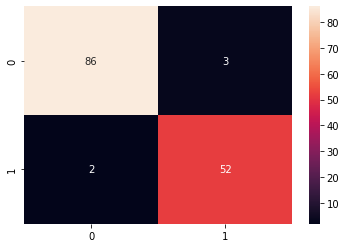

In [54]:
sns.heatmap(cm,annot=True)

So here, zero indicates, is benign and one indicates
that the cancer is a malignant, so the confusion matrix
allows you to look at the particulary misclassified examples
yourself and perform any further calculations required.So we try to visualize the performance of the classifier
in a matrix, which we called it as the confusion matrix.

Now let's calculate the accuracy of
the model on the testing data.

In [55]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.965034965034965


In [56]:
print(Y_test)

288    0
540    0
222    0
541    0
81     0
      ..
86     1
277    1
320    0
555    0
282    1
Name: diagnosis, Length: 143, dtype: int64


In [57]:
print(predictions)

[0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1]
